<a href="https://colab.research.google.com/github/D-J-C-H/Talento_Tech/blob/main/Redes_Neuronales_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import keras

### Cargue el conjunto de datos Fashion MNIST

fmnist = keras.datasets.fashion_mnist

### Cargue la division de entrenamiento y pruesa del conjunto de datos Fashion MNIST

(training_images, training_labels), (test_images,test_labels) = fmnist.load_data()

Label: 0
Image:
 [[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  

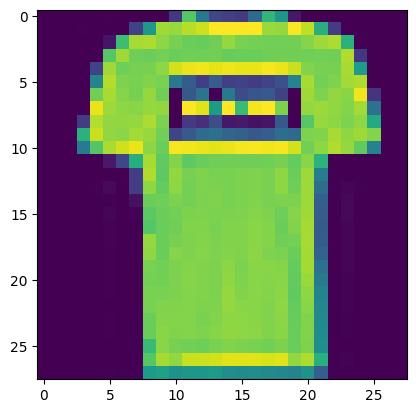

In [10]:
import numpy as np

import matplotlib.pyplot as plt

### Puedes poner aquí entre 0 y 59999

index = 1

### Imprime la etiqueta y la imagen.

np.set_printoptions(linewidth=320)

print (f'Label: {training_labels [index]}')

print (f'Image:\n {training_images[index]}')

### Visualiza la imagen

plt.imshow(training_images [index])

In [11]:
#Normalizar los valores de pixeles del tren y probar las

#imágenes.

training_images = training_images/ 255.0

test_images = test_images / 255.0

In [18]:
#Construir el modelo de clasificación

model = keras.models.Sequential ([keras.layers.Flatten (input_shape =(28,28)),

keras.layers.Dense (128, activation='relu'),

keras.layers.Dense (10, activation='softmax')])

In [20]:
# Compilar el modelo

model.compile(optimizer='adam',

loss='sparse_categorical_crossentropy',

metrics=['accuracy'])

model.summary()

#Entrenar el modelo

history = model.fit (training_images, training_labels, epochs=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4946 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3755 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss

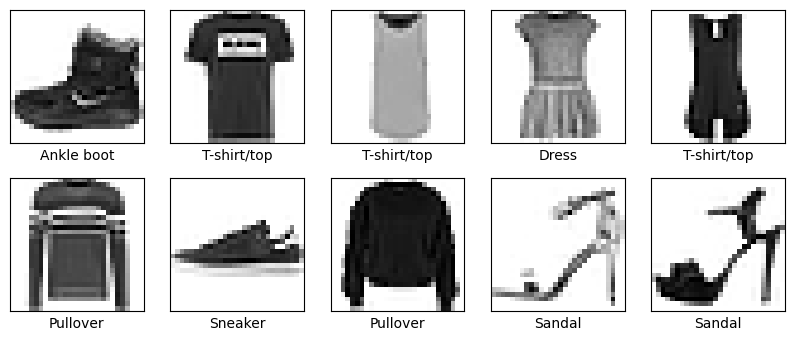

In [25]:
# Visualizar algunas imágenes de entrenamiento
def plot_sample_images(images, labels, num_rows=2, num_cols=5):
    plt.figure(figsize=(10, 4))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

# Etiquetas de las clases en Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualizar algunas imágenes con sus etiquetas
plot_sample_images(training_images, [class_names[label] for label in training_labels])


<Axes: >

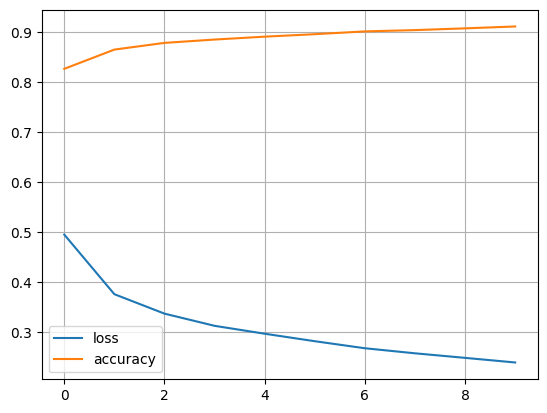

In [28]:
#Graficar el historial de entrenamiento:
import pandas as pd

pd.DataFrame(history.history).plot(grid=True)

In [35]:
#evaluar el modelo en el conjunto de entrenamiento


loss, accuracy = model.evaluate(training_images, training_labels)

print("Perdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:",accuracy)

#Evaluar el modelo con datos no vistos

Loss, accuracy = model.evaluate(test_images, test_labels)

print ("Pérdida en el conjunto de prueba:", loss)

print ("Precisión en el conjunto de prueba:", accuracy)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.2178 - accuracy: 0.9190
Perdida en el conjunto de entrenamiento: 0.2177508920431137
Precisión en el conjunto de entrenamiento: 0.9190166592597961
313/313 [==============================] - 2s 4ms/step - loss: 0.3375 - accuracy: 0.8841
Pérdida en el conjunto de prueba: 0.2177508920431137
Precisión en el conjunto de prueba: 0.8841000199317932


In [38]:
#predict
index = 1

print (f'Label: {test_labels [index]}')

classification = model.predict (test_images[index:index+1])

print (f'Classification:\n {classification.reshape(-1,1)}')

Label: 2
1/1 [==============================] - 0s 93ms/step
Classification:
 [[9.57162115e-07]
 [7.62301599e-14]
 [9.98972297e-01]
 [8.19116719e-10]
 [2.93421093e-04]
 [1.77700363e-14]
 [7.33382476e-04]
 [1.05754015e-20]
 [1.66680005e-12]
 [3.56786080e-16]]
